Folsind datele aferente anului 2017 (fisierul v1_world-happiness-report-2017.csv), să se realizeze o predicție a gradului de fericire în funcție:

In [173]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
#%matplotlib notebook
%matplotlib inline

doar de Produsul intern brut

Pasul 1 - plot pt distributia datelor & plot pt “verificarea” liniaritatii (daca legatura intre y si x e una liniara)

In [174]:
def loadData(fileName):
    file_path = 'v3_world-happiness-report-2017.csv'
    df = pd.read_csv(file_path)
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        mean_value = df[col].mean()
        df[col] = df[col].fillna(mean_value)
    return df

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'v3_world-happiness-report-2017.csv')

df = loadData(filePath)
inputs = df['Economy..GDP.per.Capita.'].tolist()
outputs = df['Happiness.Score'].tolist()
print('in:  ', inputs[:5])
print('out: ', outputs[:5])

in:   [1.616463184, 1.482383013, 1.48063302, 1.564979553, 1.443571925]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


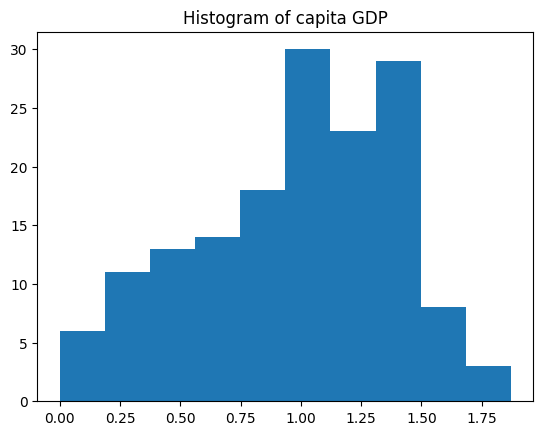

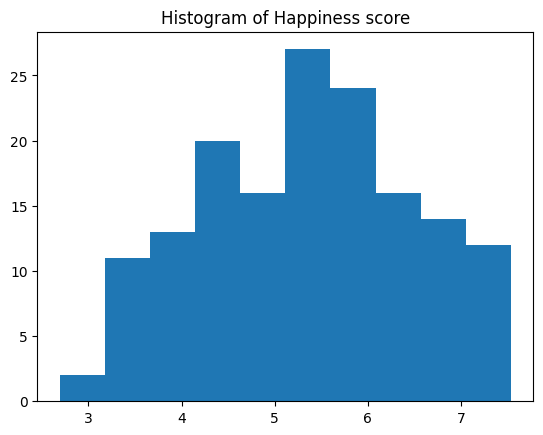

In [175]:
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

plotDataHistogram(inputs, 'capita GDP')
plotDataHistogram(outputs, 'Happiness score')

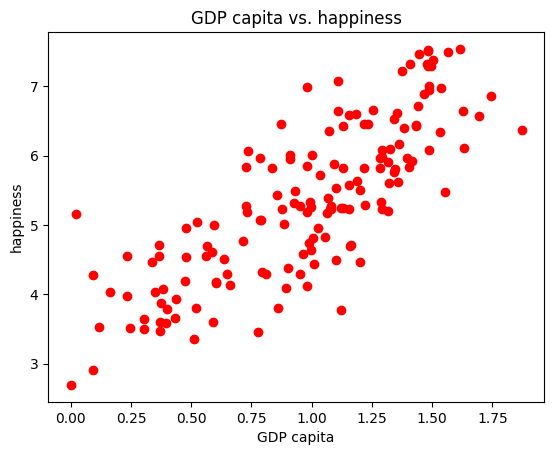

In [176]:
plt.plot(inputs, outputs, 'ro')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.title('GDP capita vs. happiness')
plt.show()

Pasul 2 - impartire date pe train si validation


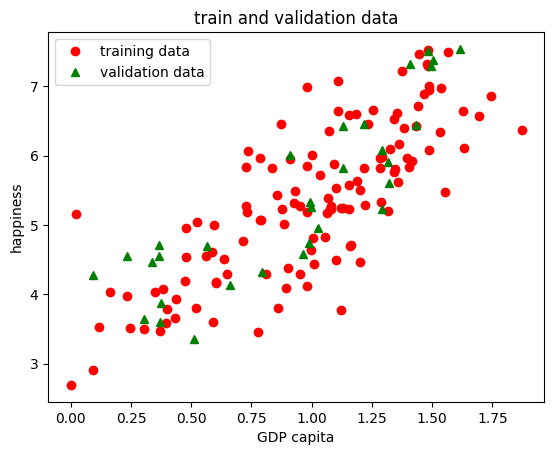

In [177]:
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
validationSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

validationInputs = [inputs[i] for i in validationSample]
validationOutputs = [outputs[i] for i in validationSample]

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')   #train data are plotted by red and circle sign
plt.plot(validationInputs, validationOutputs, 'g^', label = 'validation data')     #test data are plotted by green and a triangle sign
plt.title('train and validation data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

Pasul 3 - invatare model (cu tool generic si cu tool de least square)

In [178]:
xx = [[el] for el in trainInputs]
regressor = linear_model.LinearRegression()
regressor.fit(xx, trainOutputs)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model: f(x) =  3.230804747540283  +  2.12944289166564  * x


Pasul 4 - plot rezultate (model invatat, predictii)


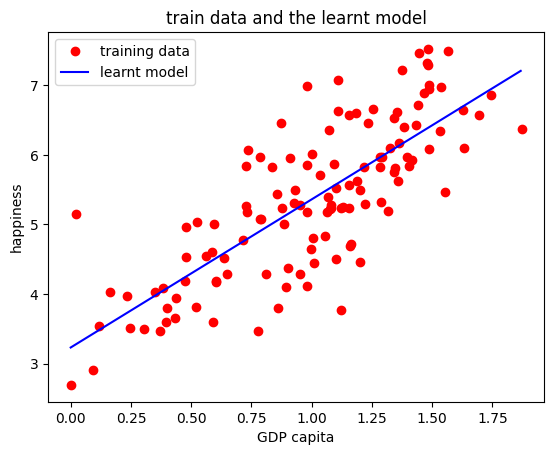

In [179]:
noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref]

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')  #train data are plotted by red and circle sign
plt.plot(xref, yref, 'b-', label = 'learnt model')                  #model is plotted by a blue line
plt.title('train data and the learnt model')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

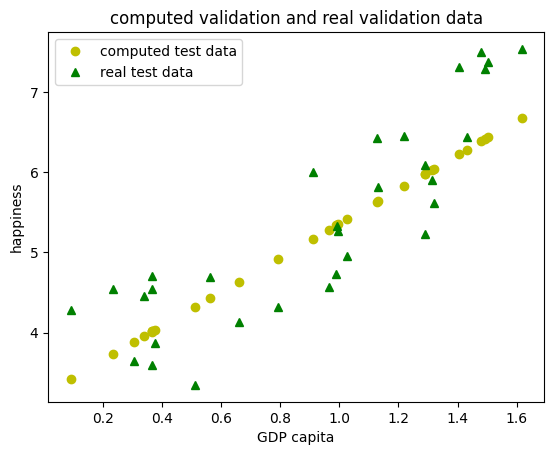

In [180]:
computedValidationOutputs = regressor.predict([[x] for x in validationInputs])
plt.plot(validationInputs, computedValidationOutputs, 'yo', label = 'computed test data')  #computed test data are plotted yellow red and circle sign
plt.plot(validationInputs, validationOutputs, 'g^', label = 'real test data')  #real test data are plotted by green triangles
plt.title('computed validation and real validation data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

Pasul 5 - calcul metrici de performanta (eroarea)

In [181]:
error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print('prediction error (manual): ', error)

from sklearn.metrics import mean_squared_error

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print('prediction error (tool):  ', error)

prediction error (manual):  0.4122807289631498
prediction error (tool):   0.4122807289631498


doar de caracteristica "Family"

Pasul 1 - plot pt distributia datelor & plot pt “verificarea” liniaritatii (daca legatura intre y si x e una liniara)

in:   [1.53352356, 1.551121593, 1.610574007, 1.516911745, 1.540246725]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


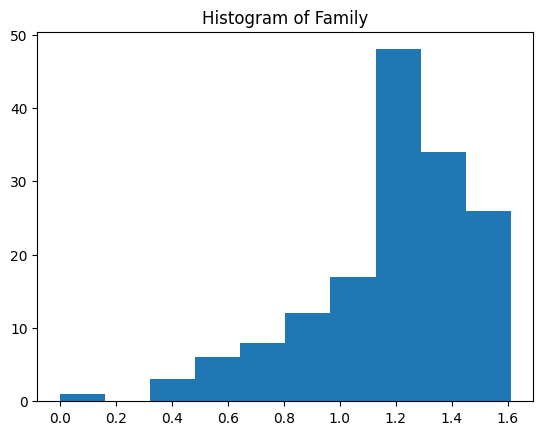

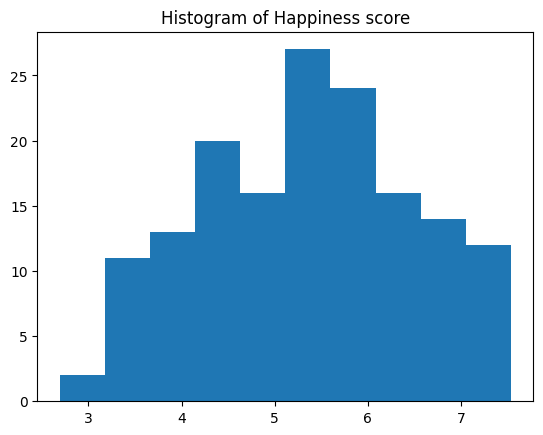

In [182]:
inputs = df['Family'].tolist()
outputs = df['Happiness.Score'].tolist()
print('in:  ', inputs[:5])
print('out: ', outputs[:5])
plotDataHistogram(inputs, 'Family')
plotDataHistogram(outputs, 'Happiness score')

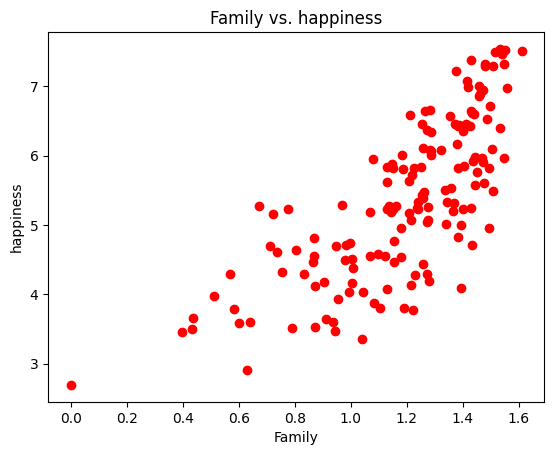

In [183]:

plt.plot(inputs, outputs, 'ro')
plt.xlabel('Family')
plt.ylabel('happiness')
plt.title('Family vs. happiness')
plt.show()

Pasul 2 - impartire date pe train si validation

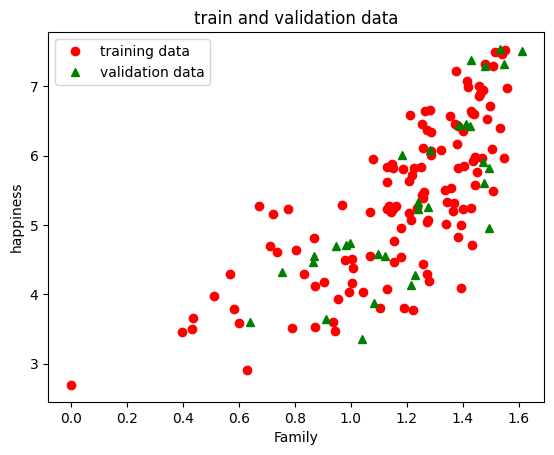

In [184]:
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
validationSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

validationInputs = [inputs[i] for i in validationSample]
validationOutputs = [outputs[i] for i in validationSample]

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')
plt.plot(validationInputs, validationOutputs, 'g^', label = 'validation data')
plt.title('train and validation data')
plt.xlabel('Family')
plt.ylabel('happiness')
plt.legend()
plt.show()

Pasul 3 - invatare model (cu tool generic si cu tool de least square)

In [185]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
degree = 3

poly = PolynomialFeatures(degree=degree)
trainInputsPoly = poly.fit_transform([[x] for x in trainInputs])

regressor = LinearRegression()
regressor.fit(trainInputsPoly, trainOutputs)

w0 = regressor.intercept_
w_coeffs = regressor.coef_

print(f'The learnt model: f(x) = {w0} ', end="")
for i in range(1, len(w_coeffs)):
    print(f'+ {w_coeffs[i]} * x^{i} ', end="")
print()

The learnt model: f(x) = 2.6528614630740464 + 3.7147304450777145 * x^1 + -3.727166105203668 * x^2 + 1.9951329440712606 * x^3 


Pasul 4 - plot rezultate (model invatat, predictii)

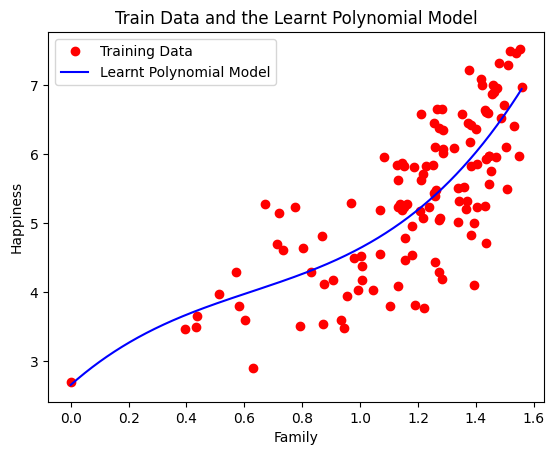

In [186]:
noOfPoints = 1000
xref = np.linspace(min(trainInputs), max(trainInputs), noOfPoints)
xrefPoly = poly.transform([[x] for x in xref])
yref = regressor.predict(xrefPoly)

plt.plot(trainInputs, trainOutputs, 'ro', label='Training Data')
plt.plot(xref, yref, 'b-', label='Learnt Polynomial Model')
plt.title('Train Data and the Learnt Polynomial Model')
plt.xlabel('Family')
plt.ylabel('Happiness')
plt.legend()
plt.show()

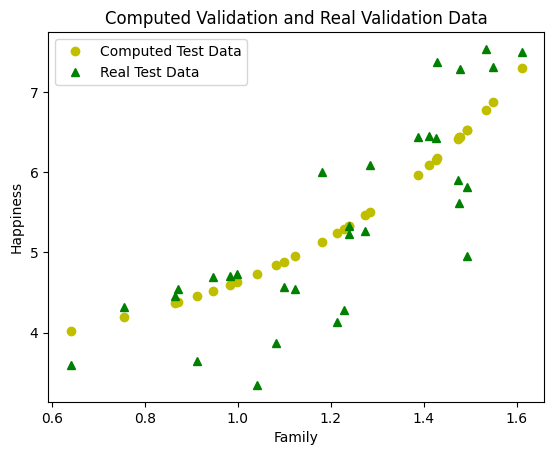

In [187]:
validationInputsPoly = poly.transform([[x] for x in validationInputs])

computedValidationOutputs = regressor.predict(validationInputsPoly)

plt.plot(validationInputs, computedValidationOutputs, 'yo', label='Computed Test Data')  # Predicted values
plt.plot(validationInputs, validationOutputs, 'g^', label='Real Test Data')  # Actual values
plt.title('Computed Validation and Real Validation Data')
plt.xlabel('Family')
plt.ylabel('Happiness')
plt.legend()
plt.show()

Pasul 5 - calcul metrici de performanta (eroarea)

In [188]:
error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print('prediction error (manual): ', error)

from sklearn.metrics import mean_squared_error

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print('prediction error (tool):  ', error)

prediction error (manual):  0.4764424154071355
prediction error (tool):   0.4764424154071354


de Produsul intern brut si de gradul de libertate

Pasul 1 - plot pt distributia datelor & plot pt “verificarea” liniaritatii (daca legatura intre y si x e una liniara)

In [189]:
inputs1 = df['Economy..GDP.per.Capita.'].tolist()
inputs2 = df['Freedom'].tolist()
outputs = df['Happiness.Score'].tolist()
print('in:  ', inputs1[:5])
print('in: ', inputs2[:5])
print('out: ', outputs[:5])

in:   [1.616463184, 1.482383013, 1.48063302, 1.564979553, 1.443571925]
in:  [0.635422587, 0.626006722, 0.627162635, 0.620070577, 0.617950857]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


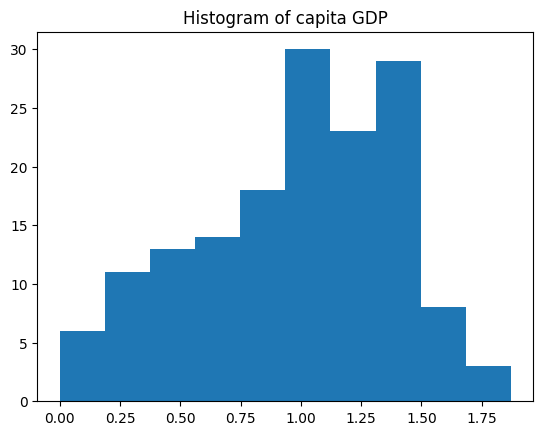

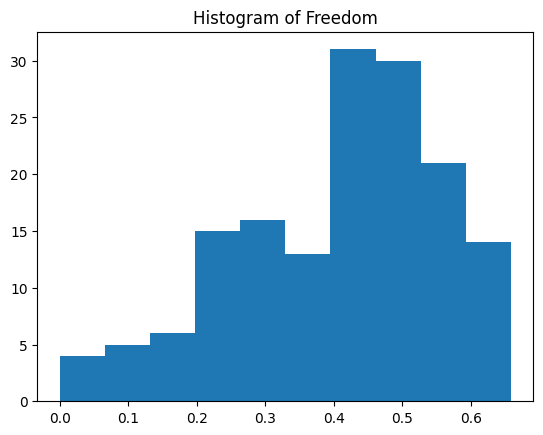

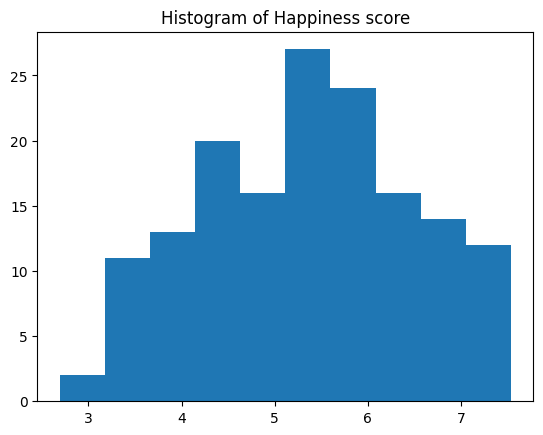

In [190]:
plotDataHistogram(inputs1, 'capita GDP')
plotDataHistogram(inputs2, 'Freedom')
plotDataHistogram(outputs, 'Happiness score')

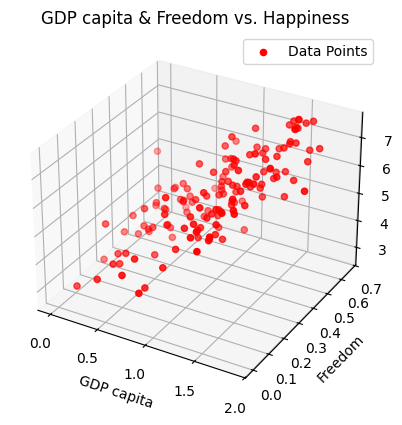

In [191]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(inputs1, inputs2, outputs, c='r', marker='o', label='Data Points')
ax.set_xlabel('GDP capita')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness')
ax.set_title('GDP capita & Freedom vs. Happiness')
plt.legend()
plt.show()

Pasul 2 - impartire date pe train si validation

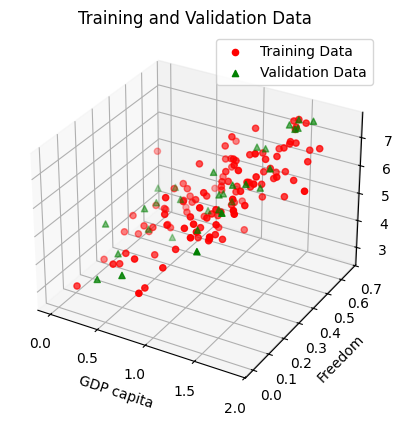

In [192]:
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
validationSample = [i for i in indexes  if not i in trainSample]

trainInputs1 = [inputs1[i] for i in trainSample]
trainInputs2 = [inputs2[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

validationInputs1 = [inputs1[i] for i in validationSample]
validationInputs2 = [inputs2[i] for i in validationSample]
validationOutputs = [outputs[i] for i in validationSample]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(trainInputs1, trainInputs2, trainOutputs, color='red', marker='o', label='Training Data')
ax.scatter(validationInputs1, validationInputs2, validationOutputs, color='green', marker='^', label='Validation Data')
ax.set_xlabel('GDP capita')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness')
ax.set_title('Training and Validation Data')
plt.legend()
plt.show()

Pasul 3 - invatare model (cu tool generic si cu tool de least square)

In [193]:
trainInputs = np.column_stack((trainInputs1, trainInputs2))
regressor = LinearRegression()
regressor.fit(trainInputs, trainOutputs)

w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]

print(f'The learnt model: Happiness = {w0:.2f} + {w1:.2f} * GDP + {w2:.2f} * Freedom')

The learnt model: Happiness = 2.51 + 1.86 * GDP + 2.42 * Freedom


Pasul 4 - plot rezultate (model invatat, predictii)

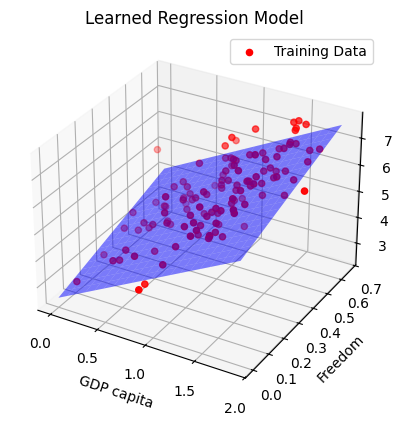

In [194]:
gdp_range = np.linspace(min(trainInputs1), max(trainInputs1), 20)
freedom_range = np.linspace(min(trainInputs2), max(trainInputs2), 20)
GDP_grid, Freedom_grid = np.meshgrid(gdp_range, freedom_range)

Happiness_grid = w0 + w1 * GDP_grid + w2 * Freedom_grid

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(trainInputs1, trainInputs2, trainOutputs, color='red', marker='o', label='Training Data')

ax.plot_surface(GDP_grid, Freedom_grid, Happiness_grid, color='blue', alpha=0.5)

ax.set_xlabel('GDP capita')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness')
ax.set_title('Learned Regression Model')

plt.legend()
plt.show()

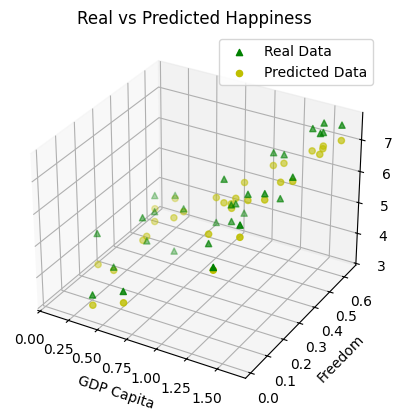

In [195]:
computedValidationOutputs = regressor.predict(list(zip(validationInputs1, validationInputs2)))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(validationInputs1, validationInputs2, validationOutputs, c='g', marker='^', label='Real Data')
ax.scatter(validationInputs1, validationInputs2, computedValidationOutputs, c='y', marker='o', label='Predicted Data')
ax.set_xlabel('GDP Capita')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness')
ax.set_title('Real vs Predicted Happiness')
ax.legend()
plt.show()

Pasul 5 - calcul metrici de performanta (eroarea)

In [196]:
error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print('prediction error (manual): ', error)

from sklearn.metrics import mean_squared_error

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print('prediction error (tool):  ', error)

prediction error (manual):  0.2767262465302119
prediction error (tool):   0.2767262465302119
